#Multiple sclerosis diagnosis

The dataset used was Multiple Sclerosis Disease from Kaggle: https://www.kaggle.com/datasets/desalegngeb/conversion-predictors-of-cis-to-multiple-sclerosis?resource=download

Libraries yellowbrick and scikit-learn installed

In [ ]:
!pip install -U yellowbrick scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Upgrading scikit-learn

In [ ]:
!pip install --upgrade scikit-learn

Importing all the libs and tools used

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.target import class_balance
from yellowbrick.features import radviz
from yellowbrick.features import rank1d, rank2d

from yellowbrick.style import set_palette, color_palette
set_palette('yellowbrick')

from matplotlib import rcParams
rcParams["figure.figsize"] =  [6.4 * 1.5, 4.8 * 1.5]

Importing the dataset

In [ ]:
df = pd.read_csv('conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv', sep=',')

Renaming all the columns to facilitate their usage

In [ ]:
df.columns = ["ID", "gender", "age", "schooling", "breastfeed", "varicella", "initial_sympton", "one_or_more_symptoms", "oliglocanal_bands", "LLSSEP", "ULSSEP", "VEP", "BAEP", "periventricular_MRI", "cortical_MRI", "infratentorial_MRI", "spinal_cord_MRI", "initial_EDSS", "final_EDSS", "group"]

Visualing the dataset head: first five lines and columns names

In [ ]:
df.head()

,ID,gender,age,schooling,breastfeed,varicella,initial_sympton,one_or_more_symptoms,oliglocanal_bands,LLSSEP,ULSSEP,VEP,BAEP,periventricular_MRI,cortical_MRI,infratentorial_MRI,spinal_cord_MRI,initial_EDSS,final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


Creating a copy from the dataset so I can freely make alterations whitout losing any data and droping the column ID from the dataset copy. The machine learning on previous situations was consideraing the ID as a factor to categorize and this was leading to only using this factor to train and test

In [ ]:
new_df = df.copy()
new_df.loc[:, new_df.columns != 'ID']

,gender,age,schooling,breastfeed,varicella,initial_sympton,one_or_more_symptoms,oliglocanal_bands,LLSSEP,ULSSEP,VEP,BAEP,periventricular_MRI,cortical_MRI,infratentorial_MRI,spinal_cord_MRI,initial_EDSS,final_EDSS,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


In [ ]:
columns = new_df.loc[:, new_df.columns != 'ID']
columns

,gender,age,schooling,breastfeed,varicella,initial_sympton,one_or_more_symptoms,oliglocanal_bands,LLSSEP,ULSSEP,VEP,BAEP,periventricular_MRI,cortical_MRI,infratentorial_MRI,spinal_cord_MRI,initial_EDSS,final_EDSS,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


Describing the dataset

In [ ]:
new_df.select_dtypes(include=['int', 'float']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,273.0,136.000000,78.952517,0.0,68.0,136.0,204.0,272.0
gender,273.0,1.615385,0.487398,1.0,1.0,2.0,2.0,2.0
age,273.0,34.062271,11.114369,15.0,25.0,33.0,40.0,77.0
schooling,272.0,15.176471,4.244175,0.0,12.0,15.0,20.0,25.0
breastfeed,273.0,1.831502,0.874998,1.0,1.0,2.0,3.0,3.0
varicella,273.0,1.710623,0.732991,1.0,1.0,2.0,2.0,3.0
initial_sympton,272.0,6.430147,4.222009,1.0,3.0,6.0,9.0,15.0
one_or_more_symptoms,273.0,1.725275,0.494066,1.0,1.0,2.0,2.0,3.0
oliglocanal_bands,273.0,0.358974,0.558426,0.0,0.0,0.0,1.0,2.0
LLSSEP,273.0,0.424908,0.495237,0.0,0.0,0.0,1.0,1.0


Droping the NaN values to avoid any problems

In [ ]:
new_df.dropna()

,ID,gender,age,schooling,breastfeed,varicella,initial_sympton,one_or_more_symptoms,oliglocanal_bands,LLSSEP,ULSSEP,VEP,BAEP,periventricular_MRI,cortical_MRI,infratentorial_MRI,spinal_cord_MRI,initial_EDSS,final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,120,1,30,20.0,2,2,9.0,2,0,1,1,1,0,0,0,0,1,1.0,1.0,1
121,121,2,42,20.0,3,3,8.0,2,0,1,1,0,0,1,1,0,0,1.0,1.0,1
122,122,1,38,22.0,3,3,14.0,2,0,1,1,0,0,1,0,0,0,1.0,1.0,1
123,123,1,70,9.0,3,3,14.0,2,0,1,1,0,0,1,1,1,0,1.0,3.0,1


Visualizing the data

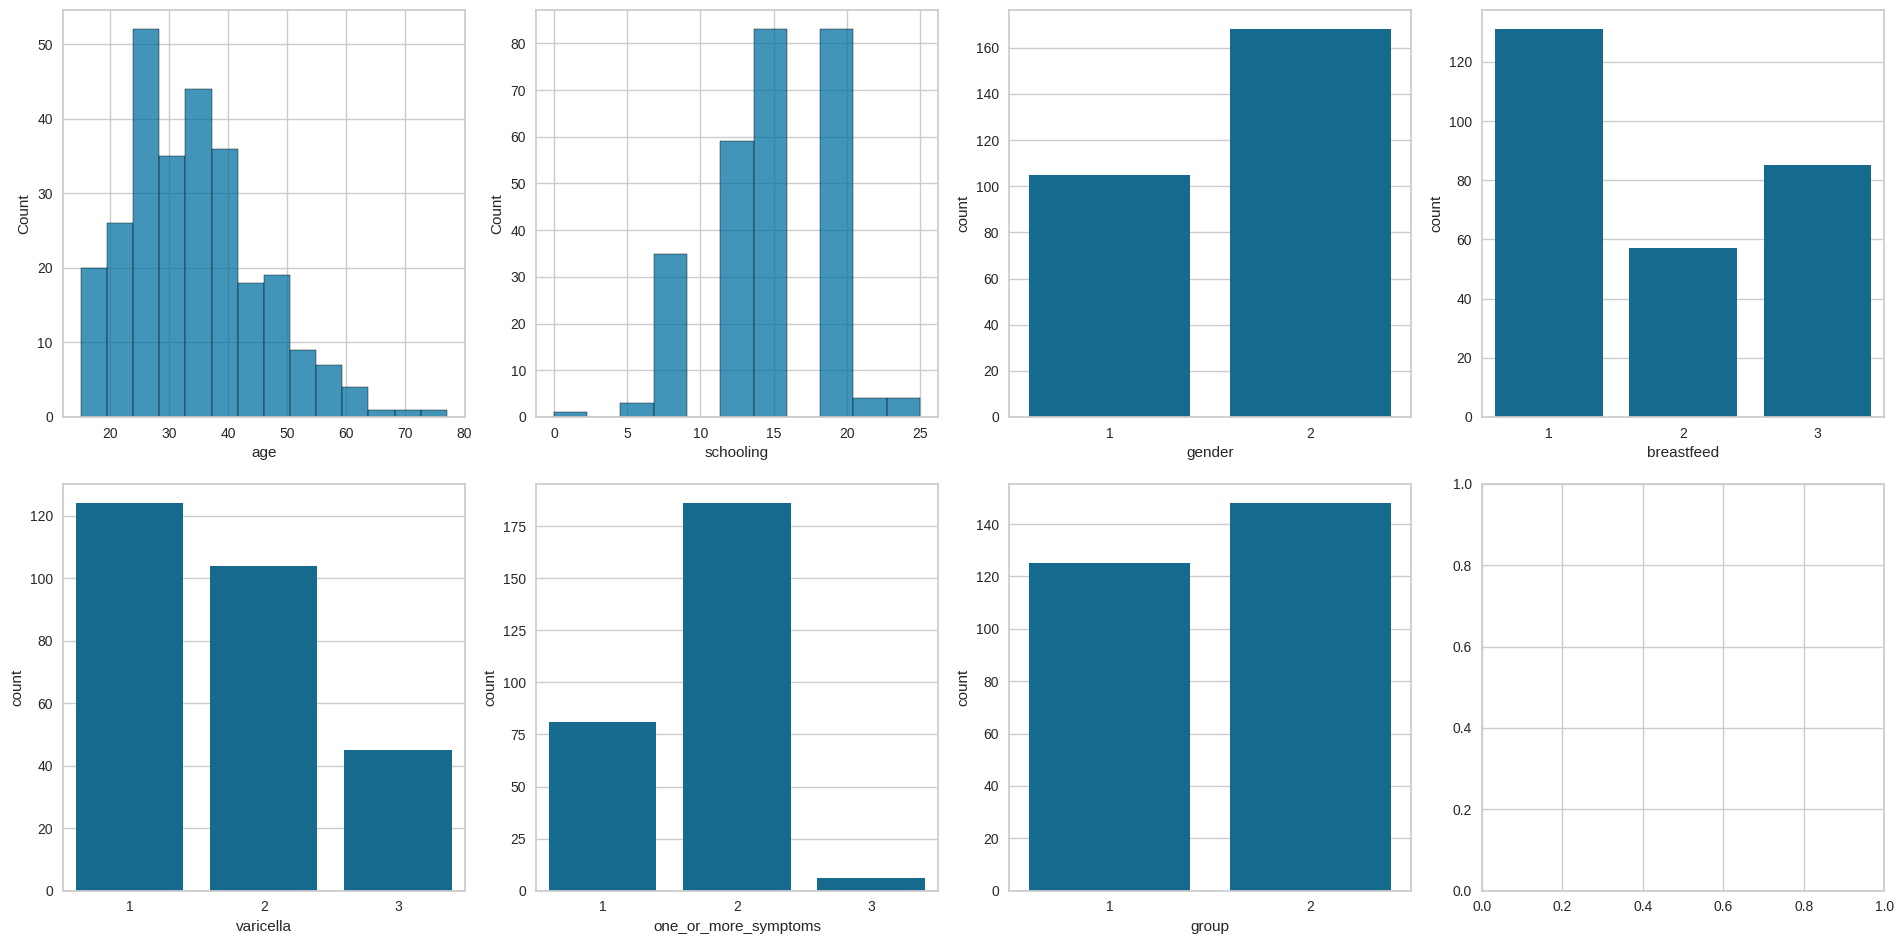

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(3 * 6.4, 2 * 4.8))

sns.histplot(x='age', data=new_df, ax=axes[0, 0], stat='count')
sns.histplot(x='schooling', data=new_df, ax=axes[0, 1], stat='count')
sns.countplot(x='gender', data=new_df, ax=axes[0, 2], stat='count')
sns.countplot(x='breastfeed', data=new_df, ax=axes[0, 3], stat='count')
sns.countplot(x='varicella', data=new_df, ax=axes[1, 0], stat='count')
sns.countplot(x='one_or_more_symptoms', data=new_df, ax=axes[1, 1])
sns.countplot(x='group', data=new_df, ax=axes[1, 2])

plt.tight_layout()

Dividing the dataset in X and y as in features and target

In [ ]:
X = new_df[new_df.columns[:-1]].copy()
X = new_df.loc[:, (new_df.columns != 'group') & (new_df.columns != 'ID')]

y = new_df[new_df.columns[-1]].copy()

In [ ]:
X.head()

,gender,age,schooling,breastfeed,varicella,initial_sympton,one_or_more_symptoms,oliglocanal_bands,LLSSEP,ULSSEP,VEP,BAEP,periventricular_MRI,cortical_MRI,infratentorial_MRI,spinal_cord_MRI,initial_EDSS,final_EDSS
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: group, dtype: int64

Checking the class balance. Looking at the results, we see the classes are balenced and there are no necessety of any kind of treatment

> Adicionar aspas



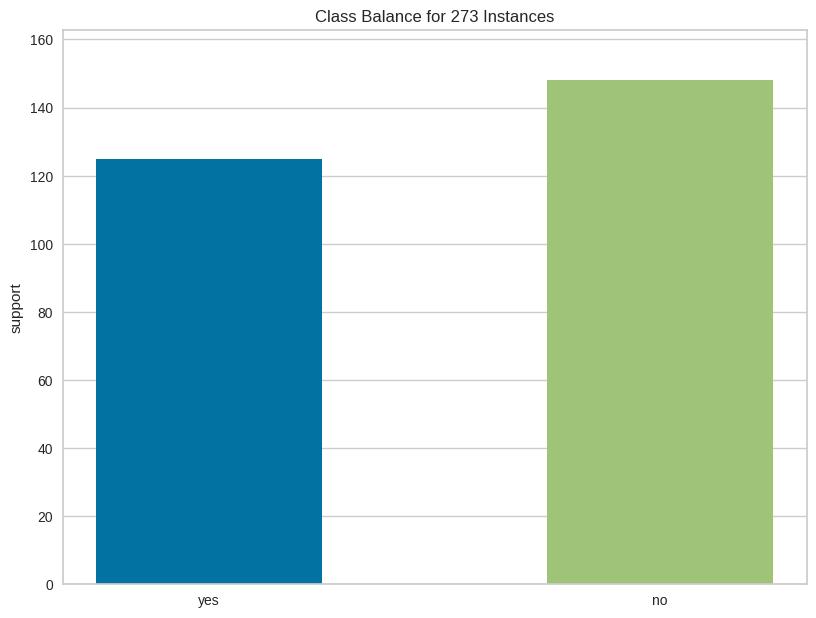

<Figure size 960x720 with 0 Axes>

In [ ]:
classes = ['yes', 'no']

class_balance(y, labels=classes)

plt.tight_layout()

Analysing the Shapiro and Pearson ranking, it's possible to conclude varicella and breastfeeding are correlated but not necessaraly affect the diagnosis criteria. Gender, age and the result of exams like MRI are more likely to be related to the diagnosis of MS

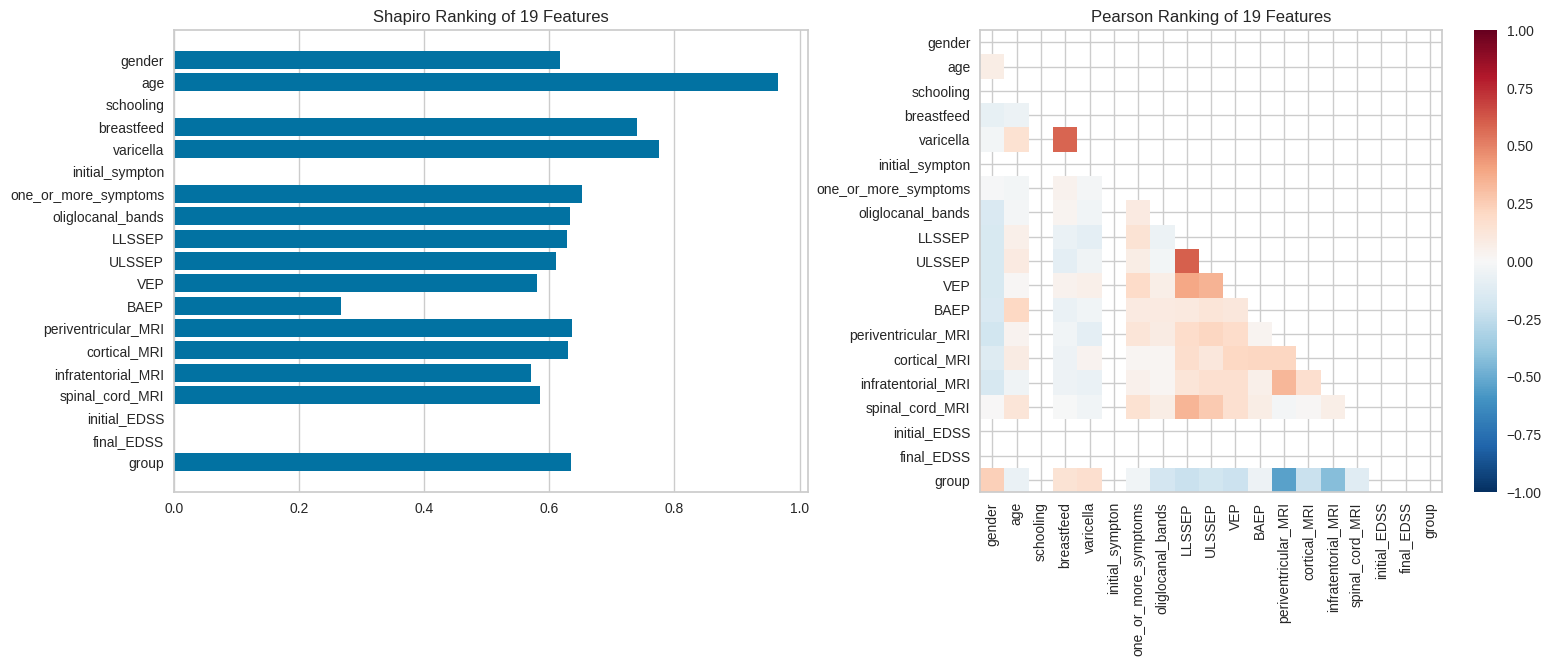

<Figure size 960x720 with 0 Axes>

In [ ]:
_, axes = plt.subplots(ncols=2, figsize=(18, 6))

rank1d(X, ax=axes[0], show=False)
rank2d(X, ax=axes[1], show=False)
plt.show()

plt.tight_layout()

Spliting in test and train

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

Constructing the model tree

In [ ]:
def visualize_tree(model):
    tree_data = export_graphviz(
        model0,
        out_file=None,
        feature_names=X.columns,
        class_names=["yes", "no"],
        filled=True,
        proportion=True,
        rounded=True,
        special_characters=True)
    graph = graphviz.Source(tree_data)
    return graph

Model 0: criterion = 'entropy', splitter = 'best', max_depth = 8, min_samples_split = 3

In [ ]:
model0 = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=8,
    min_samples_split=3,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=7,
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0)

model0.fit(x_train, y_train)

y_pred = model0.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        49

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

[[42  0]
 [ 0 49]]


Selecting the first 18 columns from 'columns' because the algorithm was expectating 18 and receveid 19

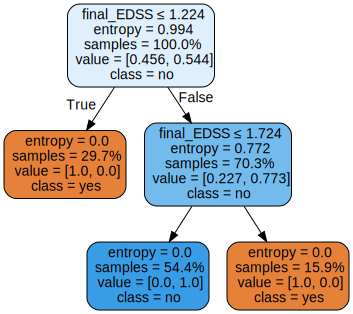

In [ ]:
X = pd.DataFrame(X, columns=columns.columns[:18]) # select the first 18 columns from 'columns'
feature_names = columns.columns[:18] # Update feature_names accordingly
visualize_tree(model0)

Model 1: criterion = 'gini', splitter = 'random', max_depth = 10, min_samples_split = 5

In [ ]:
model1 = DecisionTreeClassifier(
    criterion='gini',
    splitter='random',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=7,
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0)

model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        42
           2       0.94      0.94      0.94        49

    accuracy                           0.93        91
   macro avg       0.93      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91

[[39  3]
 [ 3 46]]


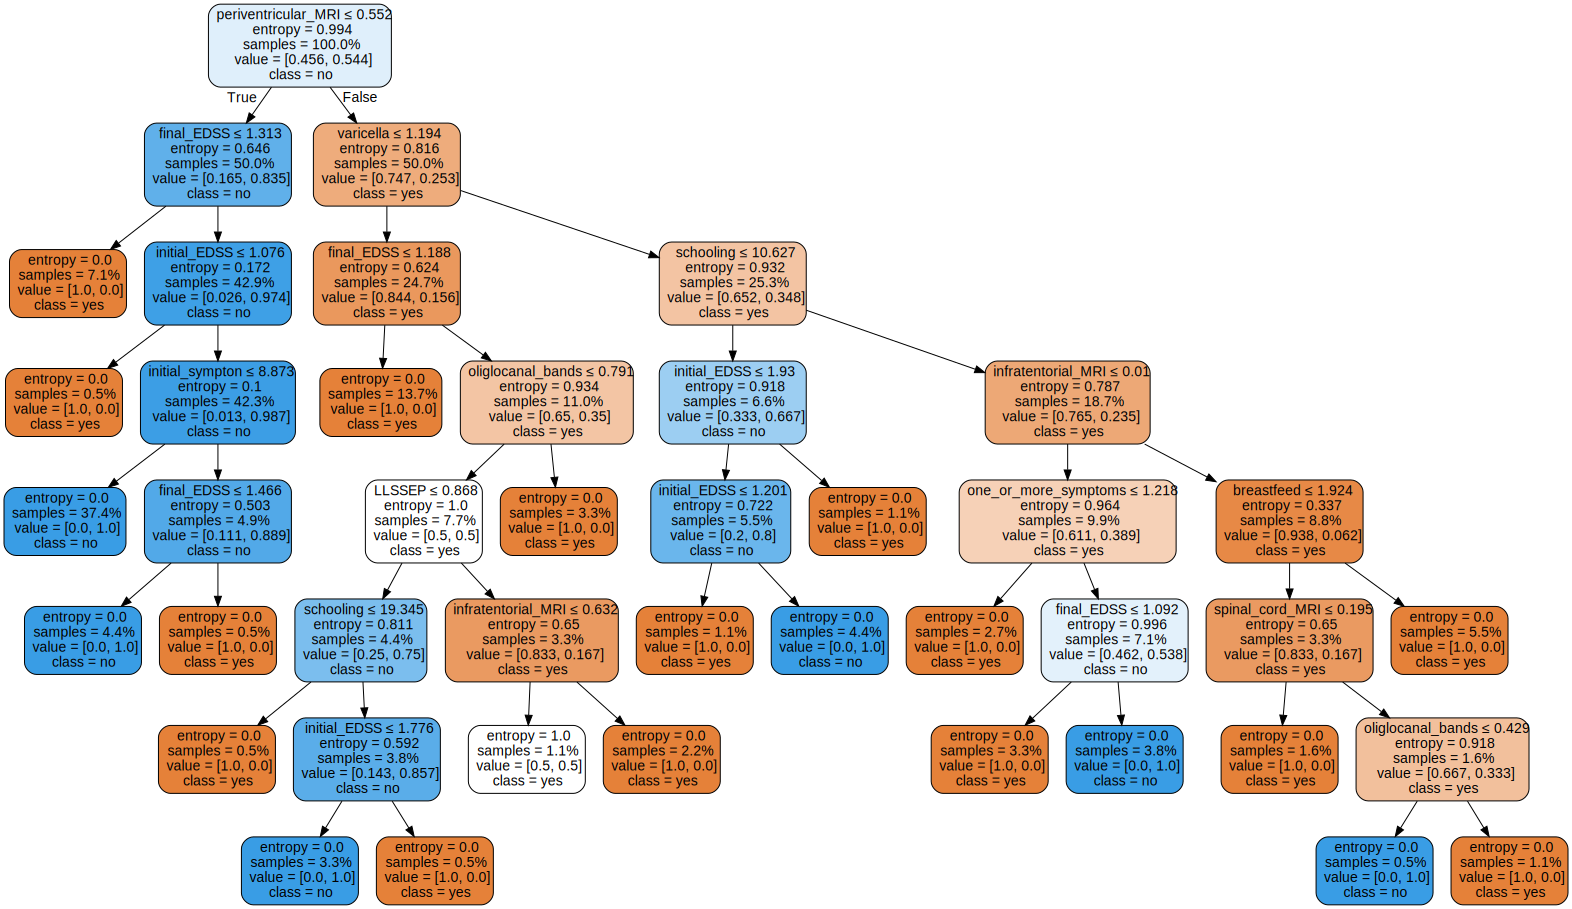

In [ ]:
X = pd.DataFrame(X, columns=columns.columns[:18])
feature_names = columns.columns[:18]
visualize_tree(model1)